# Human Activity Recognition with Smartphones

Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

Read train and test data

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
frames = [train_data, test_data]
data = pd.concat(frames)

In [8]:
#Put train and test data in the same dataframe
data.shape

(10299, 563)

In [9]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


Check for null values in training data

In [11]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Variables

In [12]:
activities = data['Activity'].unique()
activity_frequency= np.array(data['Activity'].value_counts())

In [13]:
activities

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Plot data distribution

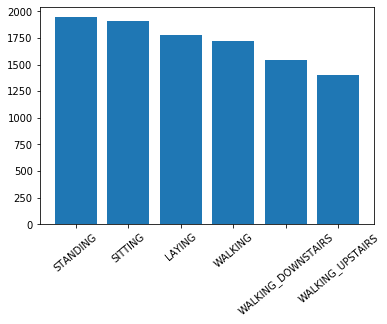

In [14]:
fig, ax = plt.subplots()
ax.bar(activities, activity_frequency)
plt.xticks(rotation = 40)
plt.show()

# Use PCA(Principal Component Analysis) for dimensionality reduction

In [15]:
#Separating the features
X_data = data.loc[:,data.columns[:-1]].values

In [16]:
# Standardizing the features
#The main idea is to normalize/standardize (mean = 0 and standard deviation = 1) your features/variables/columns of X 
#before applying Machine learning techniques.
data_scaled = StandardScaler().fit_transform(X_data)

In [17]:
pca = PCA(n_components=.99)
principalComponents = pca.fit_transform(data_scaled)
#How much each component contributed
print('Each component variance \n', pca.explained_variance_ratio_.round(2), '\n')

#PCA variance - sum of the component's variance 
print('PCA variance:\n', sum(pca.explained_variance_ratio_))

#Put the components into a DataFrame
principalDf = pd.DataFrame(data=principalComponents)
principalDf


principalComponents.shape

Each component variance 
 [0.51 0.06 0.03 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ] 

PCA variance:
 0.9900138988706895


(10299, 182)

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = data.loc[:,'Activity']

In [20]:
principalDf.shape

(10299, 182)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.3, random_state = 0)

# K Neares Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

Find the best K value

In [19]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

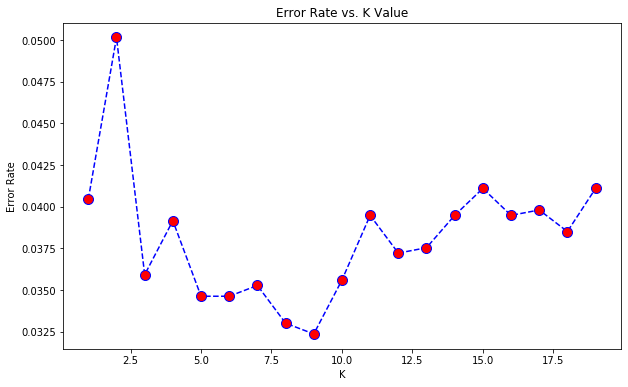

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Train the model

In [21]:
knn = KNeighborsClassifier(n_neighbors=9)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [23]:
y_pred = knn.predict(X_test)

Plot confusion matrix

Text(0.5, 1, 'KNN Confusion Matrix')

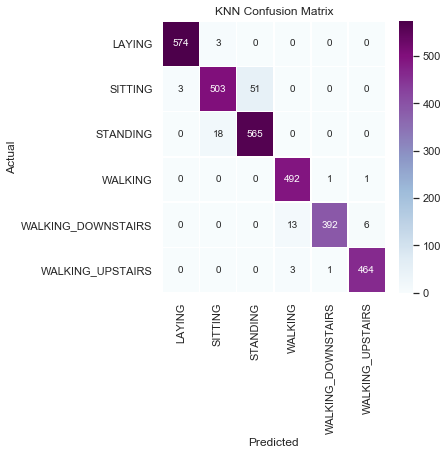

In [24]:
cf_matrix = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(y_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="BuPu",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('KNN Confusion Matrix')

In [25]:
# print('Classification Report' + classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

0.9676375404530745

In [51]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       577
           SITTING       0.96      0.90      0.93       557
          STANDING       0.92      0.97      0.94       583
           WALKING       0.97      1.00      0.98       494
WALKING_DOWNSTAIRS       0.99      0.95      0.97       411
  WALKING_UPSTAIRS       0.99      0.99      0.99       468

          accuracy                           0.97      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.97      0.97      0.97      3090



# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

Tunning hyperparameters

In [27]:
def plot_hyperparameters(param):
    fig, ax = plt.subplots()
    ax.plot( param, accuracy_train, color='green', label='train_score')
    ax.plot( param, accuracy_test, label='test_score')

    ax.set(xlabel='n_estimators', ylabel='Accuracy',
           title='Best number of trees accroding to accuracy')
    ax.grid(linestyle='-', linewidth='0.5', color='grey')
    ax.legend()
    plt.show()

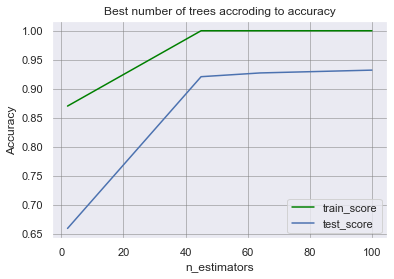

In [28]:
#number of trees
n_estimators = [2, 45, 64, 100]
accuracy_train =[]
accuracy_test =[]
for n in n_estimators:
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, y_train)
    rfc_pred_test = rfc.predict(X_test)
    rfc_pred_train = rfc.predict(X_train)
    accuracy_train.append(accuracy_score(y_train,rfc_pred_train))
    accuracy_test.append(accuracy_score(y_test,rfc_pred_test))
plot_hyperparameters(n_estimators)

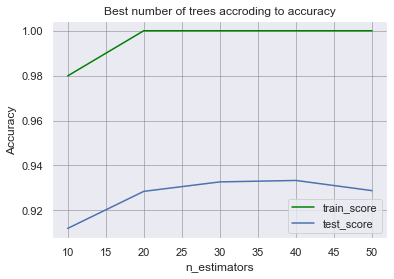

In [29]:
#max number of levels in each tree
max_depth = [10, 20, 30, 40, 50]
accuracy_train =[]
accuracy_test =[]
for d in max_depth:
    rfc = RandomForestClassifier(max_depth=d)
    rfc.fit(X_train, y_train)
    rfc_pred_test = rfc.predict(X_test)
    rfc_pred_train = rfc.predict(X_train)
    accuracy_train.append(accuracy_score(y_train,rfc_pred_train))
    accuracy_test.append(accuracy_score(y_test,rfc_pred_test))
plot_hyperparameters(max_depth)

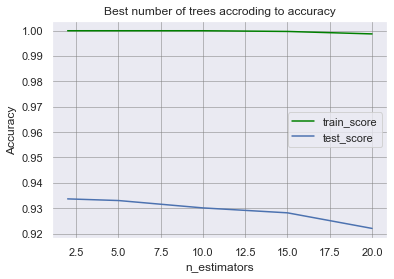

In [30]:
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
accuracy_train =[]
accuracy_test =[]
for minS in min_samples_split:
    #rfc = RandomForestClassifier(n_estimators=45, max_depth=20, min_samples_split=minS)
    rfc = RandomForestClassifier(min_samples_split=minS)
    rfc.fit(X_train, y_train)
    rfc_pred_test = rfc.predict(X_test)
    rfc_pred_train = rfc.predict(X_train)
    accuracy_train.append(accuracy_score(y_train,rfc_pred_train))
    accuracy_test.append(accuracy_score(y_test,rfc_pred_test))
plot_hyperparameters(min_samples_split)

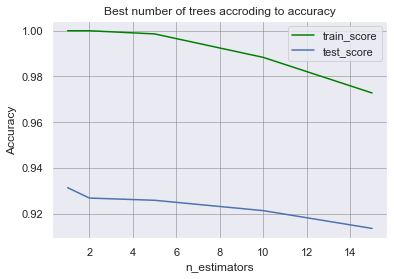

0.9135922330097087

In [31]:
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15]
accuracy_train =[]
accuracy_test =[]
for minL in min_samples_leaf:
    #rfc = RandomForestClassifier(n_estimators=45, max_depth=20, min_samples_split=10, min_samples_leaf=minL)
    rfc = RandomForestClassifier(min_samples_leaf=minL)
    rfc.fit(X_train, y_train)
    rfc_pred_test = rfc.predict(X_test)
    rfc_pred_train = rfc.predict(X_train)
    accuracy_train.append(accuracy_score(y_train,rfc_pred_train))
    accuracy_test.append(accuracy_score(y_test,rfc_pred_test))
plot_hyperparameters(min_samples_leaf)
accuracy_score(y_test, rfc_pred_test)

Train the model with tuned hyperparameters

In [32]:
rfc = RandomForestClassifier(n_estimators=45,max_depth=40, min_samples_split=5, min_samples_leaf=1 )
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

Text(0.5, 1, 'Random Forest Confusion Matrix')

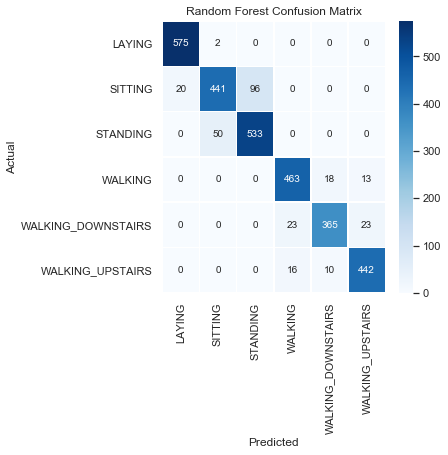

In [34]:
cf_matrix = confusion_matrix(y_test,rfc_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(rfc_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="Blues",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('Random Forest Confusion Matrix')

In [35]:
# print(classification_report(y_test,rfc_pred))
accuracy_score(y_test, rfc_pred)

0.9122977346278317

In [52]:
print(classification_report(y_test, rfc_pred))

                    precision    recall  f1-score   support

            LAYING       0.97      1.00      0.98       577
           SITTING       0.89      0.79      0.84       557
          STANDING       0.85      0.91      0.88       583
           WALKING       0.92      0.94      0.93       494
WALKING_DOWNSTAIRS       0.93      0.89      0.91       411
  WALKING_UPSTAIRS       0.92      0.94      0.93       468

          accuracy                           0.91      3090
         macro avg       0.91      0.91      0.91      3090
      weighted avg       0.91      0.91      0.91      3090



# Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
# print(classification_report(y_test, gnb_pred))
accuracy_score(y_test, gnb_pred)

0.7682847896440129

Text(0.5, 1, 'Gaussian Naive Bayes Confusion Matrix')

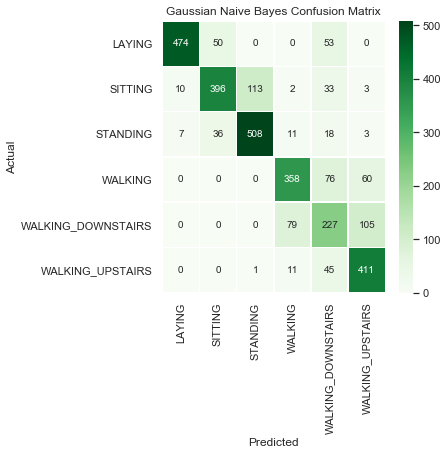

In [38]:
cf_matrix = confusion_matrix(y_test, gnb_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(gnb_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="Greens",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('Gaussian Naive Bayes Confusion Matrix')

In [53]:
print(classification_report(y_test, gnb_pred))

                    precision    recall  f1-score   support

            LAYING       0.97      0.82      0.89       577
           SITTING       0.82      0.71      0.76       557
          STANDING       0.82      0.87      0.84       583
           WALKING       0.78      0.72      0.75       494
WALKING_DOWNSTAIRS       0.50      0.55      0.53       411
  WALKING_UPSTAIRS       0.71      0.88      0.78       468

          accuracy                           0.77      3090
         macro avg       0.76      0.76      0.76      3090
      weighted avg       0.78      0.77      0.77      3090



# Support Vector Machine

In [39]:
from sklearn.svm import SVC

No handles with labels found to put in legend.


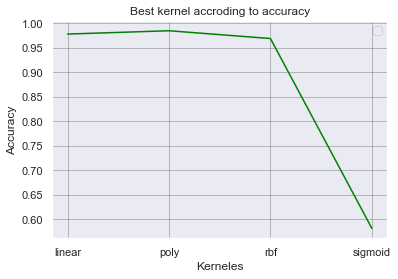

In [40]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for k in kernels:
    svc = SVC(gamma='auto', kernel=k)
    svc.fit(X_train, y_train)
    svc_predict = svc.predict(X_test)
    accuracies.append(accuracy_score(y_test, svc_predict))

fig, ax = plt.subplots()
ax.plot( kernels, accuracies, color='green')

ax.set(xlabel='Kerneles', ylabel='Accuracy',
       title='Best kernel accroding to accuracy')
ax.grid(linestyle='-', linewidth='0.5', color='grey')
ax.legend()
plt.show()

In [41]:
svc = SVC(gamma='auto', kernel='poly')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test, svc_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       577
           SITTING       0.96      0.97      0.97       557
          STANDING       0.97      0.96      0.97       583
           WALKING       0.99      0.99      0.99       494
WALKING_DOWNSTAIRS       1.00      0.98      0.99       411
  WALKING_UPSTAIRS       0.99      1.00      0.99       468

          accuracy                           0.98      3090
         macro avg       0.99      0.99      0.99      3090
      weighted avg       0.98      0.98      0.98      3090



In [42]:
accuracy_score(y_test, svc_pred)

0.984789644012945

Text(0.5, 1, 'Support Vector Machine Confusion Matrix')

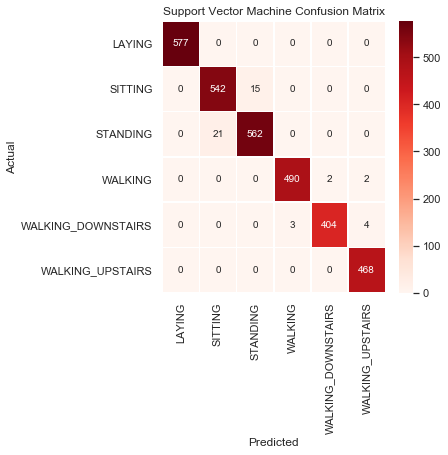

In [43]:
cf_matrix = confusion_matrix(y_test,svc_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(svc_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="Reds",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('Support Vector Machine Confusion Matrix')

# Fine-tune the Model

1.Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [20]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [21]:
#convert strings into numeric classes
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
y_train_numeric = number.fit_transform(y_train)
y_train_numeric


array([5, 2, 3, ..., 2, 0, 1])

In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train_numeric)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

2.K Neares Neighbors

In [ ]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [25]:
best_model = pickle.load(open('best_model.sav', 'rb'))
y_pred = best_model.predict(X_test)
number = preprocessing.LabelEncoder()
y_test_numeric = number.fit_transform(y_test)
y_test_numeric

In [ ]:
cf_matrix = confusion_matrix(y_test_numeric,y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(y_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="BuPu",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('KNN Confusion Matrix')

3.Suport Vector Machine

In [ ]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

In [ ]:
svm_model = pickle.load(open('svm_model.sav', 'rb'))
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

# Stacking KNN with SVM

In [21]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [22]:
from sklearn.model_selection import StratifiedKFold
import pickle

svm_model = pickle.load(open('svm_model.sav', 'rb'))

model1 = svm_model

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

KeyboardInterrupt: 

In [ ]:
best_model = pickle.load(open('best_model.sav', 'rb'))
model2 = best_model

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [ ]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

In [ ]:
s_pred = model.predict(X_test)

In [ ]:
cf_matrix = confusion_matrix(y_test,s_pred)
df_cm = pd.DataFrame(cf_matrix, columns=np.unique(y_test), index = np.unique(s_pred))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1) #for label size
sns.heatmap(df_cm,cmap="Yellows",fmt="d", annot=True, annot_kws={"size": 10}, linewidths=.5)# font size
plt.title('Stacking Confusion Matrix')

In [ ]:
print(classification_report(y_test, s_pred))

# Save the models

In [3]:
import pickle
# save the svm model to disk
filename_1 = 'svm_model.sav'
pickle.dump(svm_model, open(filename_1, 'wb'))

NameError: name 'svm_model' is not defined

In [ ]:
# save the knn model to disk
filename_2 = 'best_model.sav'
pickle.dump(best_model, open(filename_2, 'wb'))